### DOTA 데이터셋 분석

annotation 파일별 label 된 개수가 너무 많아서 가끔 CUDA OOM 이 발생하곤 했다.

그래서 도대체 DOTA 데이터셋에 labeling 된 건 몇 개가 있으며

어떤 분포로? 이뤄져 있는지 확인해보고자 작성한다.

In [1]:
import os
from glob import glob

In [2]:
def get_dota_analyzed_info(path, remove_meta=True, path_splitter='/'):
    annotation_path = path

    file_list = glob(annotation_path)

    filename_list = []
    anno_count_list = []

    min_count = 99999999999
    max_count = 0
    total_count = 0

    for i, file in enumerate(file_list):
        #if i > 100:
        #    break
        filename = file.split(path_splitter)[-1]
        with open(file) as f:
            annotations = f.readlines()
            anno_count = len(annotations)
            if remove_meta is True:
                anno_count -= 2       # 2 means meta row count
        
        filename_list.append(filename)
        anno_count_list.append(anno_count)
        total_count += anno_count
        
        if anno_count < min_count:
            min_count = anno_count
        if anno_count > max_count:
            max_count = anno_count    
        
    return [filename_list, anno_count_list, min_count, max_count, total_count]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(target, analyzed_info):
    height = analyzed_info[1]
    bars = tuple(analyzed_info[0])
    x_pos = np.arange(len(bars))
    
    min_count = analyzed_info[2]
    max_count = analyzed_info[3]
    total_count = analyzed_info[4]

    # figure size
    fig = plt.figure(figsize=(12,8))

    # Create bars and choose color
    plt.bar(bars, height, color=(0.5, 0.1, 0.5, 0.6))

    # Add title and axis names
    plt.title(target + ' - label count per file')
    plt.xlabel('filename')
    plt.ylabel('count')

    # Create names on the x axis
    plt.xticks(x_pos, bars, rotation=45)

    # Show graph
    plt.show()

### 데이터 그룹화

In [25]:
import pandas as pd
from pandas import DataFrame

In [6]:
def generate_bins_list(max_value, devide_value):
    bins_count = (max_value // devide_value) + 3
    bins_list = np.arange(0, bins_count * devide_value, devide_value)
    return bins_list 

### DOTA-v1.0 데이터

In [7]:
# DOTA-v1.0 train
path = '../dl_data/DOTA-v1.0-v1.5/train/labelTxt-v1.0/*.txt'

train_info = get_dota_analyzed_info(path)
train_info[2:]

[0, 1939, 98990]

In [8]:
# DOTA-v1.0 val
path = '../dl_data/DOTA-v1.0-v1.5/val/labelTxt-v1.0/*.txt'

val_info = get_dota_analyzed_info(path)
val_info[2:]

[0, 1401, 28853]

In [9]:
# DOTA-v1.0 train 분포
bins_list = generate_bins_list(train_info[3], 100)
df = DataFrame({'value': train_info[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 100]",1158,25.348877,24.432983,1.0,100.0
"(100, 200]",142,140.556338,27.430253,101.0,199.0
"(200, 300]",35,247.942857,25.771556,201.0,299.0
"(300, 400]",34,353.352941,31.530536,303.0,400.0
"(400, 500]",14,453.071429,30.146984,404.0,498.0
"(500, 600]",5,540.400000,38.095932,502.0,599.0
"(600, 700]",5,633.400000,36.115094,603.0,696.0
"(700, 800]",4,770.000000,30.735430,743.0,800.0
"(800, 900]",5,849.600000,28.192198,820.0,886.0


In [10]:
# DOTA-v1.0 val 분포
bins_list = generate_bins_list(val_info[3], 100)
df = DataFrame({'value': val_info[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 100]",387,24.467700,23.290592,1.0,100.0
"(100, 200]",32,133.625000,25.425096,103.0,199.0
"(200, 300]",17,254.823529,28.140796,206.0,298.0
"(300, 400]",7,331.714286,29.629458,303.0,395.0
"(400, 500]",5,438.600000,34.107184,404.0,481.0
"(500, 600]",4,540.250000,28.570089,512.0,580.0
"(600, 700]",1,625.000000,NaN,625.0,625.0
"(700, 800]",1,727.000000,NaN,727.0,727.0
"(800, 900]",0,NaN,NaN,NaN,NaN


### DOTA-v1.5 데이터

In [11]:
# DOTA-v1.5 train
path = '../dl_data/DOTA-v1.0-v1.5/train/DOTA-v1.5_train/*.txt'

train_info_15 = get_dota_analyzed_info(path)
train_info_15[2:]

[0, 10206, 210631]

In [12]:
# DOTA-v1.5 val
path = '../dl_data/DOTA-v1.0-v1.5/val/DOTA-v1.5_val/*.txt'

val_info_15 = get_dota_analyzed_info(path)
val_info_15[2:]

[1, 8609, 69565]

In [13]:
# DOTA-v1.5 train 분포
bins_list = generate_bins_list(train_info_15[3], 1000)
df = DataFrame({'value': train_info_15[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 1000]",1371,101.644785,165.222244,1.0,1000.0
"(1000, 2000]",30,1359.700000,326.625606,1008.0,1994.0
"(2000, 3000]",7,2180.857143,185.167877,2013.0,2526.0
"(3000, 4000]",0,NaN,NaN,NaN,NaN
"(4000, 5000]",0,NaN,NaN,NaN,NaN
"(5000, 6000]",1,5013.000000,NaN,5013.0,5013.0
"(6000, 7000]",0,NaN,NaN,NaN,NaN
"(7000, 8000]",0,NaN,NaN,NaN,NaN
"(8000, 9000]",0,NaN,NaN,NaN,NaN


In [14]:
# DOTA-v1.5 val 분포
bins_list = generate_bins_list(val_info_15[3], 1000)
df = DataFrame({'value': val_info_15[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 1000]",445,88.8,138.822990,1.0,876.0
"(1000, 2000]",10,1551.2,257.001859,1186.0,1995.0
"(2000, 3000]",1,2001.0,NaN,2001.0,2001.0
"(3000, 4000]",1,3927.0,NaN,3927.0,3927.0
"(4000, 5000]",0,NaN,NaN,NaN,NaN
"(5000, 6000]",0,NaN,NaN,NaN,NaN
"(6000, 7000]",0,NaN,NaN,NaN,NaN
"(7000, 8000]",0,NaN,NaN,NaN,NaN
"(8000, 9000]",1,8609.0,NaN,8609.0,8609.0


### DOTA-v2.0 데이터

In [15]:
# DOTA-v2.0 train
path = '../dl_data/DOTA-v2.0/train/labelTxt-v2.0/DOTA-v2.0_train/*.txt'

train_info_20 = get_dota_analyzed_info(path, remove_meta=False)
train_info_20[2:]

[0, 10206, 268627]

In [16]:
# DOTA-v2.0 val
path = '../dl_data/DOTA-v2.0/val/labelTxt-v2.0/DOTA-v2.0_val/*.txt'

val_info_20 = get_dota_analyzed_info(path, remove_meta=False)
val_info_20[2:]

[1, 8609, 81048]

In [17]:
# DOTA-v2.0 train 분포
bins_list = generate_bins_list(train_info_20[3], 1000)
df = DataFrame({'value': train_info_20[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 1000]",1779,89.189994,161.960458,1.0,1000.0
"(1000, 2000]",33,1350.303030,313.048966,1008.0,1994.0
"(2000, 3000]",10,2198.500000,175.869428,2013.0,2526.0
"(3000, 4000]",1,3356.000000,NaN,3356.0,3356.0
"(4000, 5000]",2,4364.500000,444.770165,4050.0,4679.0
"(5000, 6000]",1,5013.000000,NaN,5013.0,5013.0
"(6000, 7000]",1,6220.000000,NaN,6220.0,6220.0
"(7000, 8000]",0,NaN,NaN,NaN,NaN
"(8000, 9000]",0,NaN,NaN,NaN,NaN


In [18]:
# DOTA-v2.0 val 분포
bins_list = generate_bins_list(val_info_20[3], 1000)
df = DataFrame({'value': val_info_20[1]})
factor_value = pd.cut(df.value, bins=bins_list)
grouped_value = df.value.groupby(factor_value)
grouped_value.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
value,,,,,
"(0, 1000]",577,78.708839,143.903813,1.0,989.0
"(1000, 2000]",12,1569.250000,247.443336,1186.0,1995.0
"(2000, 3000]",2,2133.000000,186.676190,2001.0,2265.0
"(3000, 4000]",1,3927.000000,NaN,3927.0,3927.0
"(4000, 5000]",0,NaN,NaN,NaN,NaN
"(5000, 6000]",0,NaN,NaN,NaN,NaN
"(6000, 7000]",0,NaN,NaN,NaN,NaN
"(7000, 8000]",0,NaN,NaN,NaN,NaN
"(8000, 9000]",1,8609.000000,NaN,8609.0,8609.0


### 그래프

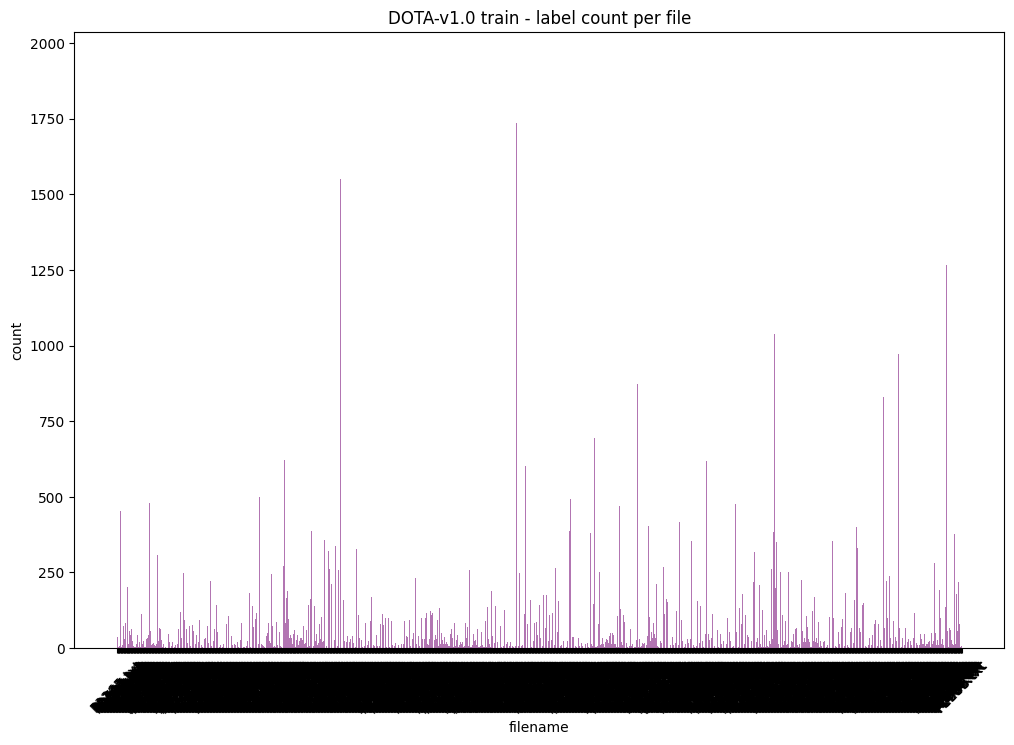

In [19]:
draw_graph('DOTA-v1.0 train', train_info)

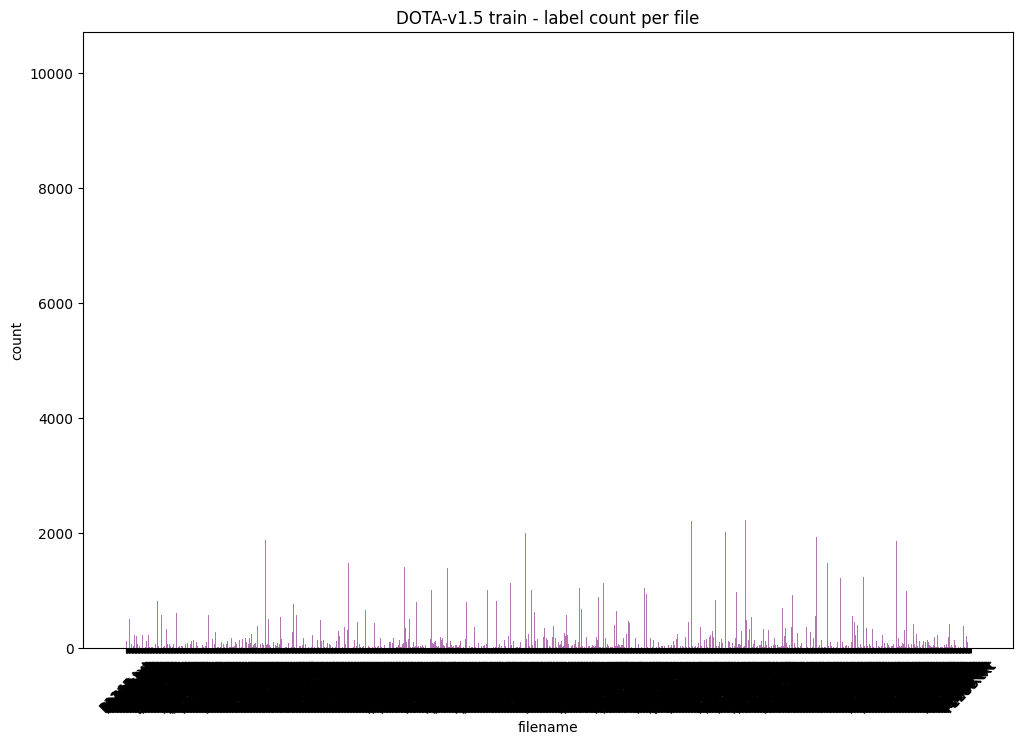

In [20]:
draw_graph('DOTA-v1.5 train', train_info_15)

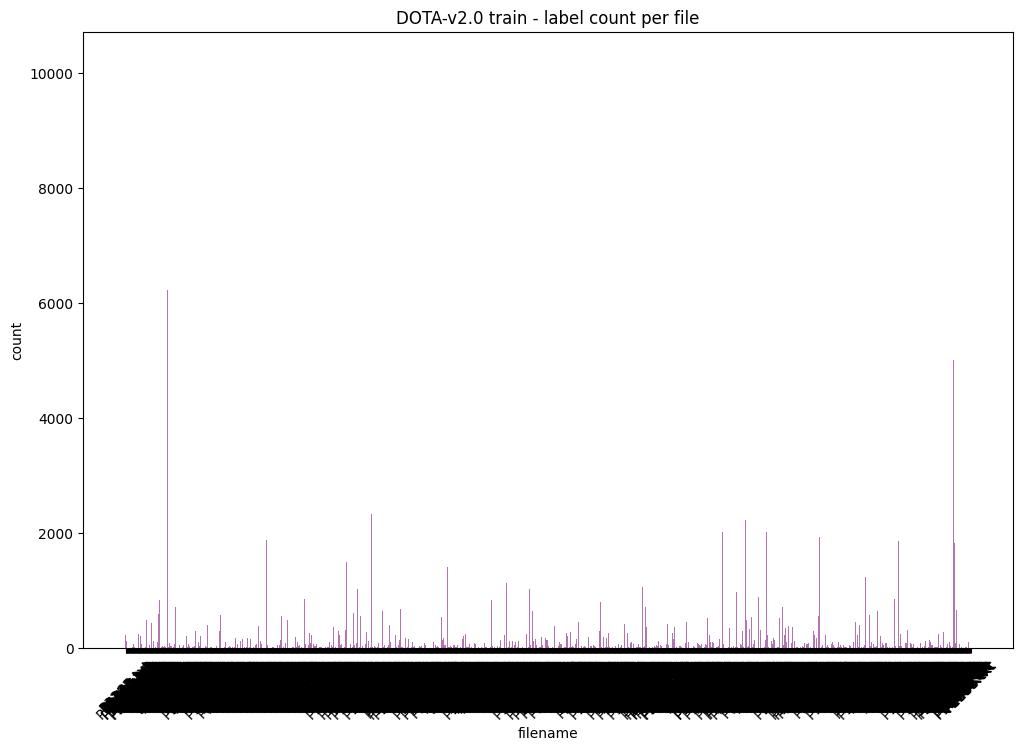

In [21]:
draw_graph('DOTA-v2.0 train', train_info_20)

### 히스토그램

(array([1.298e+03, 6.900e+01, 2.200e+01, 8.000e+00, 8.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([   0. ,  193.9,  387.8,  581.7,  775.6,  969.5, 1163.4, 1357.3,
        1551.2, 1745.1, 1939. ]),
 <BarContainer object of 10 artists>)

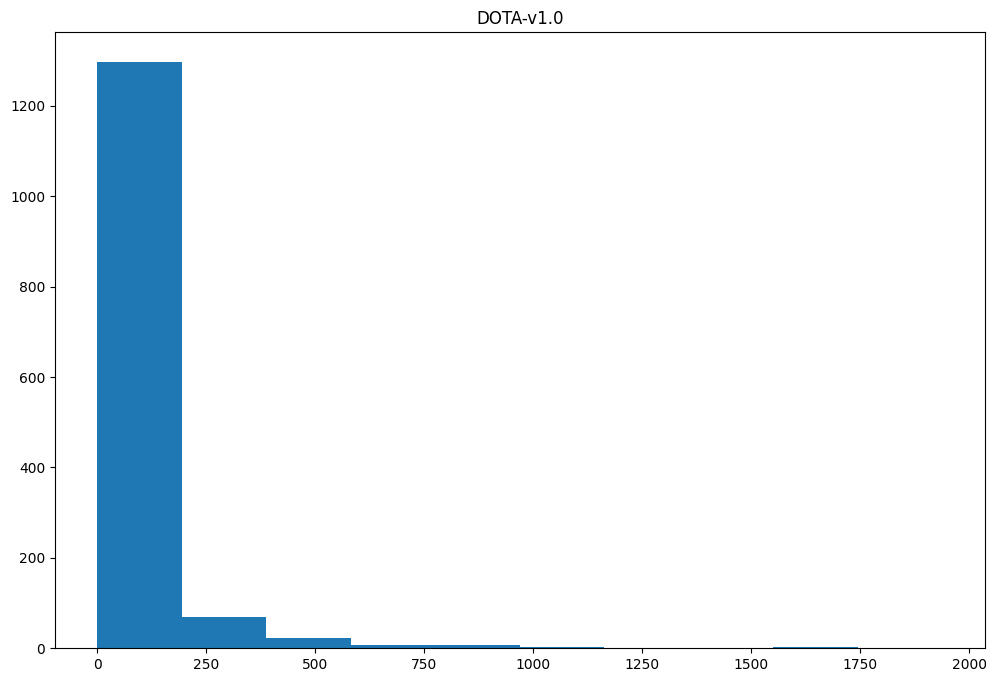

In [22]:
plt.figure(figsize=(12,8))
plt.title('DOTA-v1.0')
plt.hist(train_info[1])

(array([1.375e+03, 3.000e+01, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1020.6,  2041.2,  3061.8,  4082.4,  5103. ,  6123.6,
         7144.2,  8164.8,  9185.4, 10206. ]),
 <BarContainer object of 10 artists>)

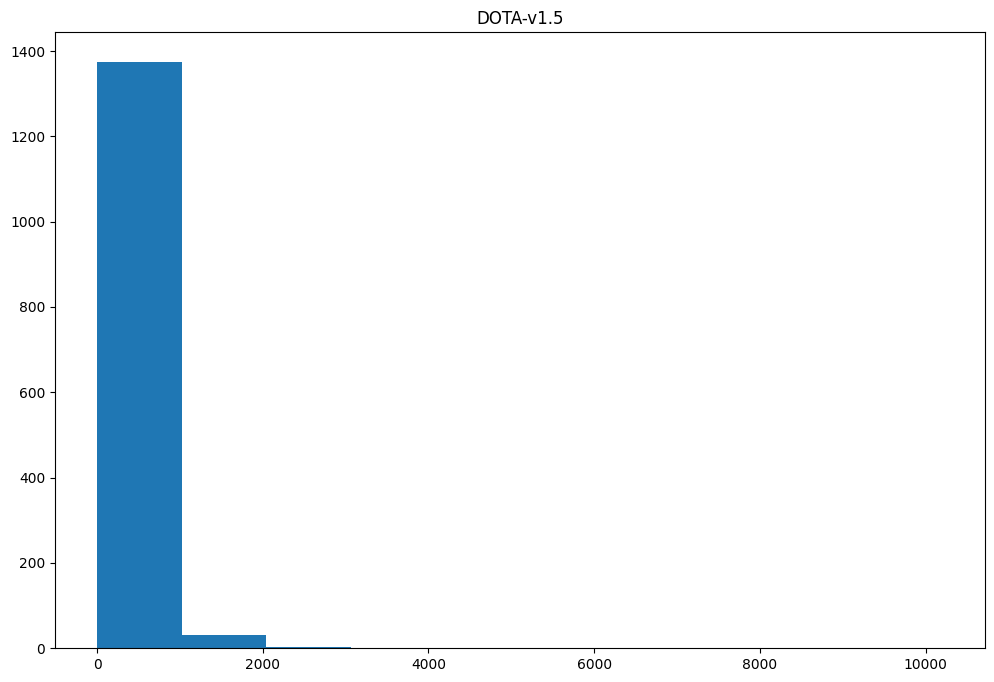

In [23]:
plt.figure(figsize=(12,8))
plt.title('DOTA-v1.5')
plt.hist(train_info_15[1])

(array([1.783e+03, 3.400e+01, 6.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([    0. ,  1020.6,  2041.2,  3061.8,  4082.4,  5103. ,  6123.6,
         7144.2,  8164.8,  9185.4, 10206. ]),
 <BarContainer object of 10 artists>)

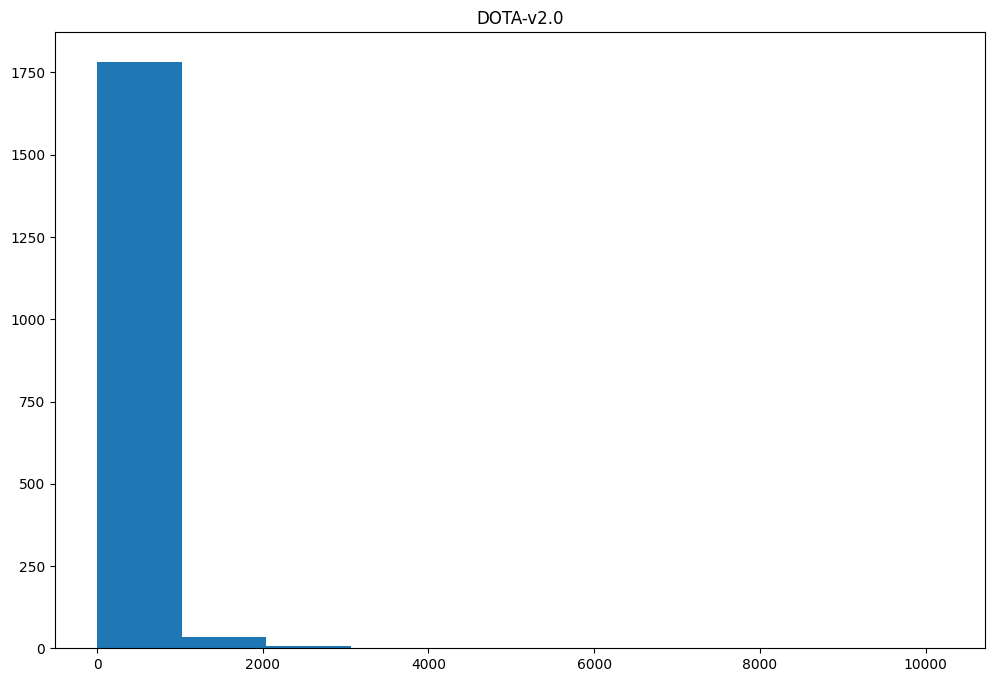

In [24]:
plt.figure(figsize=(12,8))
plt.title('DOTA-v2.0')
plt.hist(train_info_20[1])